# 4 Gram Analysis
get every word generated by a method and its frequency. 
Get the 4grams of each of the words and their frequencies. Can then make these plots.


## May want to rewind this so that I can get the overall word frequencies also. 

In [181]:
import pickle
import gzip
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax
import pandas as pd    
import torch

n_gram = 4
prompt_length = 100
num_batches = 4
batch_size=25

In [182]:

# need to re-generate these according to the seed. 
bad_inds = [11, 20, 29, 35, 63, 80, 84, 94]

In [183]:
# used to decode:
from decodeLogits import *
vals_dict = {'tfs':[0.25, 0.75, 0.9, 0.95, 0.99],
'n': [0.5, 0.63, 0.69, 0.81, 0.75, 0.9], 'k':[1,40,200]  }

In [186]:
seed = 27
parallelized = '_345M_model-parallelized'
for key, params in vals_dict.items():
    print('Key is:', key)
    for par in params:
        if par ==None:
            par = "None"
            #print('opening file:', 'gpt-2_output/all_logits_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz')
        #all_logits = pickle.load( gzip.open('gpt-2_output/all_logits_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz', 'rb'))
        text = pickle.load( gzip.open('gpt-2_output/all_text_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts_'+str(seed)+'-seed'+parallelized+'.pickle.gz', 'rb'))
        break
    break
        

Key is: tfs


In [187]:
text[0].shape

(25, 250)

In [188]:
tot_num = 0
for i in range(num_batches):
    tot_num+= text[i].shape[0]
print('total number of samples:', tot_num)

total number of samples: 100


In [189]:
tot_good_samples = list(set(range(tot_num)) - set(bad_inds))
tot_good_samples;

# works for all but the generated text. 

# need to use moses to detokenize

In [190]:
import matplotlib.pyplot as plt
from scipy.special import softmax
import pandas as pd    
import torch
import copy
import re
num_samples = tot_num
num_batches = num_samples//batch_size

word_frequency_for_all = dict()
token_frequency_for_all = dict()

num_target_too_short = 0

for key, params in vals_dict.items():
    print('Key is:', key)
    for par in params:
        if par ==None:
            par = "None"
        print('opening file:', 'gpt-2_output/all_logits_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz')
        text = pickle.load( gzip.open('gpt-2_output/all_text_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts_'+str(seed)+'-seed'+parallelized+'.pickle.gz', 'rb'))
 
        #text = pickle.load( gzip.open('gpt-2_output/all_text_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts_'+str(seed)+'-seed.pickle.gz', 'rb'))

        p_ind = 0
        
        # keep here if want accumulation!!! 
        #word_freq_temp = dict()
        #token_freq_temp = dict()
        
        for batch in range(num_batches):
            for ind in range(0,text[batch].shape[0]):

                if p_ind in bad_inds:
                    p_ind+=1
                    continue
                
                if p_ind%25 == 0:
                    pass
                    #print('index', str(p_ind))
                    
                # this is the ground truth calculations =====
                
                for is_prompt in [True, False]:
                    
                    word_freq_temp = dict()
                    token_freq_temp = dict()
                    
                    if is_prompt==True:
                        tokens = text[batch][ind, :prompt_length]
                    else: 
                        tokens = text[batch][ind, prompt_length:]

                    decoded_text_generated = decoder_text(tokens)
                    #decoded_text_generated = decoded_text_generated.lower()
                    #decoded_text_generated = re.sub('\n', ' ',decoded_text_generated )
                    #word_set = list(set(decoded_text_generated.split(' '))) # may be some fuction that does this
                    word_list = decoded_text_generated.split(' ')

                    for w in word_list:
                        w = w.strip()
                        #removing punctuation:
                        w = re.sub(r'[^\w\s]','',w)
                        if w in word_freq_temp.keys():
                            word_freq_temp[w] += 1
                        else:
                            word_freq_temp[w] = 1

                    for w in tokens:
                        if w in token_freq_temp.keys():
                            token_freq_temp[w] += 1
                        else:
                            token_freq_temp[w] = 1

                    word_frequency_for_all[key+'-sampling-type_'+str(par)+'prompt_'+str(p_ind)+'_is_prompt-'+str(is_prompt)] = copy.copy(word_freq_temp)

                    token_frequency_for_all[key+'-sampling-type_'+str(par)+'prompt_'+str(p_ind)+'_is_prompt-'+str(is_prompt)] = copy.copy(token_freq_temp)
                
                p_ind+=1
                


Key is: tfs
opening file: gpt-2_output/all_logits_tfs-sampling-type_0.25-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz
opening file: gpt-2_output/all_logits_tfs-sampling-type_0.75-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz
opening file: gpt-2_output/all_logits_tfs-sampling-type_0.9-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz
opening file: gpt-2_output/all_logits_tfs-sampling-type_0.95-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz
opening file: gpt-2_output/all_logits_tfs-sampling-type_0.99-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz
Key is: n
opening file: gpt-2_output/all_logits_n-sampling-type_0.5-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz
opening file: gpt-2_output/all_logits_n-sampling-type_0.63-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz
open

In [191]:
len(word_frequency_for_all.keys())

2576

In [192]:
len(word_frequency_for_all['tfs-sampling-type_0.75prompt_1'+'_is_prompt-'+str(False)])

89

In [193]:
pd.DataFrame.from_dict([word_frequency_for_all['tfs-sampling-type_0.75prompt_2'+'_is_prompt-'+str(False)]])

,,As,But,Capricorn,Cave,He,It,So,Somes,The,...,things,throughout,to,too,up,was,went,wished,with,wrong
0,1,1,1,2,1,1,1,1,1,3,...,1,1,4,1,2,3,1,1,1,1


# Converting words and then tokens to frequencies

In [194]:
def convToFreq(dict_to_analyze, ground=False):
    word_freq_percentage = dict()
    tot_word_occ = dict()
    if ground==False: # ground truth or not. 
        for key, params in vals_dict.items():
            print('Key is:', key)
            for par in params:
                
                for is_prompt in [True, False]:
                
                    num_unique_words = []

                    for counter, i in enumerate(tot_good_samples):
                        
                        dict_key = key+'-sampling-type_'+str(par)+'prompt_'+str(i)+'_is_prompt-'+str(is_prompt)
                        
                        unique_num_words_temp = len(dict_to_analyze[dict_key])
                        unique_word_occurences_temp = 0
                        for k, v in dict_to_analyze[dict_key].items():
                            unique_word_occurences_temp += v
                        num_unique_words.append((unique_num_words_temp,unique_word_occurences_temp)) 
                        to_df = []
                        for k, v in dict_to_analyze[dict_key].items():
                            to_df.append( (k, v / unique_word_occurences_temp) )
                        word_freq_percentage[key+'-sampling-type_'+str(par)+'prompt_'+str(counter)+'_is_prompt-'+str(is_prompt)] = pd.DataFrame(to_df,
                                                                                                            columns=['words', 'freq'])

                    tot_word_occ[key+'-sampling-type_'+str(par)+'_is_prompt-'+str(is_prompt)] = num_unique_words

    else:
        
        
        for is_prompt in [True, False]:
            
            num_unique_words = []
        
            for i in range(len(tot_good_samples)):

                dict_key='ground_prompt_'+str(i)+'_is_prompt-'+str(is_prompt)

                unique_num_words_temp = len(dict_to_analyze[dict_key])
                unique_word_occurences_temp = 0
                for k, v in dict_to_analyze[dict_key].items():
                    unique_word_occurences_temp += v
                num_unique_words.append((unique_num_words_temp,unique_word_occurences_temp)) 
                to_df = []
                for k, v in dict_to_analyze[dict_key].items():
                    to_df.append( (k, v / unique_word_occurences_temp) )
                word_freq_percentage[dict_key] = pd.DataFrame(to_df,
                                                                                                    columns=['words', 'freq'])

            tot_word_occ['ground'+'_is_prompt-'+str(is_prompt)] = num_unique_words

    return word_freq_percentage, tot_word_occ

In [195]:
word_freq_percentage, tot_word_occ = convToFreq(word_frequency_for_all)
token_freq_percentage, tot_token_occ = convToFreq(token_frequency_for_all)

Key is: tfs
Key is: n
Key is: k
Key is: tfs
Key is: n
Key is: k


In [196]:
tot_token_occ.keys() #['tfs-sampling-type_0.25']

dict_keys(['tfs-sampling-type_0.25_is_prompt-True', 'tfs-sampling-type_0.25_is_prompt-False', 'tfs-sampling-type_0.75_is_prompt-True', 'tfs-sampling-type_0.75_is_prompt-False', 'tfs-sampling-type_0.9_is_prompt-True', 'tfs-sampling-type_0.9_is_prompt-False', 'tfs-sampling-type_0.95_is_prompt-True', 'tfs-sampling-type_0.95_is_prompt-False', 'tfs-sampling-type_0.99_is_prompt-True', 'tfs-sampling-type_0.99_is_prompt-False', 'n-sampling-type_0.5_is_prompt-True', 'n-sampling-type_0.5_is_prompt-False', 'n-sampling-type_0.63_is_prompt-True', 'n-sampling-type_0.63_is_prompt-False', 'n-sampling-type_0.69_is_prompt-True', 'n-sampling-type_0.69_is_prompt-False', 'n-sampling-type_0.81_is_prompt-True', 'n-sampling-type_0.81_is_prompt-False', 'n-sampling-type_0.75_is_prompt-True', 'n-sampling-type_0.75_is_prompt-False', 'n-sampling-type_0.9_is_prompt-True', 'n-sampling-type_0.9_is_prompt-False', 'k-sampling-type_1_is_prompt-True', 'k-sampling-type_1_is_prompt-False', 'k-sampling-type_40_is_prompt-Tru

In [197]:
tot_token_occ['tfs-sampling-type_0.75'+'_is_prompt-'+str(False)]

[(97, 150),
 (109, 150),
 (91, 150),
 (106, 150),
 (103, 150),
 (103, 150),
 (113, 150),
 (105, 150),
 (119, 150),
 (105, 150),
 (113, 150),
 (113, 150),
 (107, 150),
 (97, 150),
 (101, 150),
 (117, 150),
 (109, 150),
 (104, 150),
 (93, 150),
 (102, 150),
 (109, 150),
 (112, 150),
 (114, 150),
 (119, 150),
 (115, 150),
 (121, 150),
 (125, 150),
 (114, 150),
 (114, 150),
 (96, 150),
 (103, 150),
 (108, 150),
 (119, 150),
 (118, 150),
 (98, 150),
 (112, 150),
 (97, 150),
 (94, 150),
 (111, 150),
 (109, 150),
 (111, 150),
 (98, 150),
 (108, 150),
 (102, 150),
 (114, 150),
 (108, 150),
 (102, 150),
 (118, 150),
 (104, 150),
 (110, 150),
 (100, 150),
 (106, 150),
 (115, 150),
 (107, 150),
 (110, 150),
 (118, 150),
 (110, 150),
 (120, 150),
 (103, 150),
 (109, 150),
 (110, 150),
 (90, 150),
 (107, 150),
 (112, 150),
 (111, 150),
 (105, 150),
 (100, 150),
 (104, 150),
 (107, 150),
 (102, 150),
 (96, 150),
 (109, 150),
 (113, 150),
 (102, 150),
 (111, 150),
 (104, 150),
 (99, 150),
 (108, 150)

In [198]:
word_freq_percentage['tfs-sampling-type_0.25prompt_4'+'_is_prompt-'+str(False)].head()

,words,freq
0,,0.026087
1,wasnt,0.008696
2,stringy,0.008696
3,enough,0.008696
4,on,0.008696


In [199]:
token_freq_percentage['tfs-sampling-type_0.25prompt_4'+'_is_prompt-'+str(False)].head()

,words,freq
0,11,0.013333
1,2492,0.006667
2,470,0.020000
3,4731,0.006667
4,88,0.006667


# Getting ground truth frequency

In [200]:
text = pickle.load( gzip.open('gpt-2_output/all_text_perplexity_scores_for_the_dataset_Human_StoryPrompts_Completion.csv.pickle.gz', 'rb'))

In [201]:
len(text[0])

23

In [202]:
new_text = []
for b in range(num_batches):
    new_text+=text[b]

In [203]:
text=new_text

In [204]:
prompt_length

100

In [205]:
new_text = []
for i in range(len(tot_good_samples)):
    text[i]

In [206]:
len(text[0])

250

In [207]:
import matplotlib.pyplot as plt
from scipy.special import softmax
import pandas as pd    
import torch
import copy
import re
num_samples = tot_num
num_batches = num_samples//batch_size

word_frequency_ground = dict()
token_frequency_ground = dict()

num_target_too_short = 0

#word_freq_temp = dict()
#token_freq_temp = dict()

for ind in range(len(tot_good_samples)):
    
    for is_prompt in [True, False]:
                    
        word_freq_temp = dict()
        token_freq_temp = dict()

        if is_prompt==True:
            tokens = text[ind][:prompt_length]
        else: 
            tokens = text[ind][prompt_length:]

        decoded_text_generated = decoder_text(tokens)
        #decoded_text_generated = decoded_text_generated.lower()
        #decoded_text_generated = re.sub('\n', ' ',decoded_text_generated )
        #word_set = list(set(decoded_text_generated.split(' '))) # may be some fuction that does this
        word_list = decoded_text_generated.split(' ')

        for w in word_list:
            w = w.strip()
            #removing punctuation:
            w = re.sub(r'[^\w\s]','',w)
            if w in word_freq_temp.keys():
                word_freq_temp[w] += 1
            else:
                word_freq_temp[w] = 1

        for w in tokens:
            if w in token_freq_temp.keys():
                token_freq_temp[w] += 1
            else:
                token_freq_temp[w] = 1

        word_frequency_ground['ground_prompt_'+str(ind)+'_is_prompt-'+str(is_prompt)] = copy.copy(word_freq_temp)
        token_frequency_ground['ground_prompt_'+str(ind)+'_is_prompt-'+str(is_prompt)] = copy.copy(token_freq_temp)

In [208]:
ground_word_freq_percentage, ground_tot_word_occ = convToFreq(word_frequency_ground, ground=True)
ground_token_freq_percentage, ground_tot_token_occ = convToFreq(token_frequency_ground, ground=True)

In [209]:
ground_tot_token_occ['ground_is_prompt-False']

[(95, 150),
 (94, 150),
 (83, 150),
 (97, 150),
 (107, 150),
 (78, 150),
 (103, 150),
 (87, 150),
 (101, 150),
 (101, 150),
 (96, 150),
 (102, 150),
 (91, 150),
 (101, 150),
 (93, 150),
 (102, 150),
 (88, 150),
 (85, 150),
 (94, 150),
 (101, 150),
 (77, 150),
 (88, 150),
 (104, 150),
 (87, 150),
 (105, 150),
 (104, 150),
 (95, 150),
 (99, 150),
 (100, 150),
 (94, 150),
 (94, 150),
 (96, 150),
 (99, 150),
 (96, 150),
 (90, 150),
 (102, 150),
 (106, 150),
 (91, 150),
 (99, 150),
 (83, 150),
 (99, 150),
 (88, 150),
 (94, 150),
 (88, 150),
 (93, 150),
 (99, 150),
 (94, 150),
 (102, 150),
 (101, 150),
 (94, 150),
 (106, 150),
 (97, 150),
 (94, 150),
 (98, 150),
 (104, 150),
 (96, 150),
 (109, 150),
 (87, 150),
 (82, 150),
 (87, 150),
 (101, 150),
 (94, 150),
 (103, 150),
 (96, 150),
 (104, 150),
 (98, 150),
 (98, 150),
 (105, 150),
 (92, 150),
 (88, 150),
 (73, 150),
 (100, 150),
 (99, 150),
 (91, 150),
 (88, 150),
 (101, 150),
 (86, 150),
 (90, 150),
 (99, 150),
 (89, 150),
 (105, 150),
 (

# New, plot of how many unique tokens used for each of the generations, with each method a different color

In [210]:
token_freq_percentage['tfs-sampling-type_0.25prompt_0'+'_is_prompt-'+str(False)] #.keys() #, tot_token_occ

,words,freq
0,3124,0.006667
1,262,0.060000
2,1748,0.006667
3,7714,0.006667
4,290,0.033333
5,534,0.033333
6,6227,0.006667
7,284,0.033333
8,1949,0.006667
9,302,0.006667


In [211]:
ground_tot_token_occ

{'ground_is_prompt-True': [(65, 100),
  (65, 100),
  (56, 100),
  (58, 100),
  (78, 100),
  (78, 100),
  (77, 100),
  (72, 100),
  (81, 100),
  (66, 100),
  (78, 100),
  (74, 100),
  (75, 100),
  (77, 100),
  (71, 100),
  (70, 100),
  (71, 100),
  (75, 100),
  (70, 100),
  (65, 100),
  (63, 100),
  (74, 100),
  (77, 100),
  (75, 100),
  (80, 100),
  (77, 100),
  (72, 100),
  (73, 100),
  (79, 100),
  (74, 100),
  (82, 100),
  (76, 100),
  (68, 100),
  (76, 100),
  (78, 100),
  (83, 100),
  (76, 100),
  (71, 100),
  (63, 100),
  (73, 100),
  (76, 100),
  (76, 100),
  (69, 100),
  (67, 100),
  (77, 100),
  (78, 100),
  (70, 100),
  (73, 100),
  (74, 100),
  (63, 100),
  (70, 100),
  (70, 100),
  (74, 100),
  (72, 100),
  (73, 100),
  (86, 100),
  (75, 100),
  (67, 100),
  (66, 100),
  (82, 100),
  (75, 100),
  (74, 100),
  (72, 100),
  (78, 100),
  (78, 100),
  (74, 100),
  (68, 100),
  (71, 100),
  (66, 100),
  (74, 100),
  (58, 100),
  (75, 100),
  (77, 100),
  (66, 100),
  (73, 100),


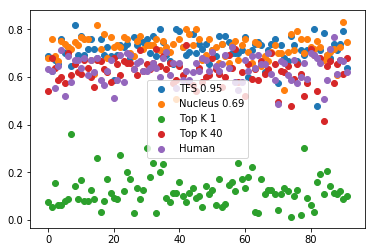

In [212]:
key_pars_to_plot = ['tfs_0.95','n_0.69', 'k_40', 'k_1']#['tfs_0.9', 'tfs_0.95', 'tfs_0.99', 'n_0.63', 'n_0.69', 'n_0.81', 'k_40', '']

for key, params in vals_dict.items():
    for par in params:  
        
        if key+'_'+str(par) in key_pars_to_plot:
        
            to_iter = tot_token_occ[key+'-sampling-type_'+str(par)+'_is_prompt-'+str(False)]

            if key=='n':
                key_label = "Nucleus"
            elif key=='tfs':
                key_label='TFS'
            elif key=='k':
                key_label='Top K'

            x_axis = range(0,len(to_iter))
            y_axis = []
            for ind, el in enumerate(to_iter):
                word_percentage_temp = el[0] / el[1]
                y_axis.append(word_percentage_temp)
            plt.scatter(x_axis, y_axis, label=key_label+" "+str(par))

to_iter = ground_tot_token_occ['ground'+'_is_prompt-'+str(False)]
x_axis = range(0,len(to_iter))
y_axis = []
for ind, el in enumerate(to_iter):
    word_percentage_temp = el[0] / el[1]
    y_axis.append(word_percentage_temp)
plt.scatter(x_axis, y_axis, label='Human')
            
plt.legend()
plt.show()

        

Human deviation for  tfs is 0.08521739130434783
Human deviation for  n is 0.09123188405797099


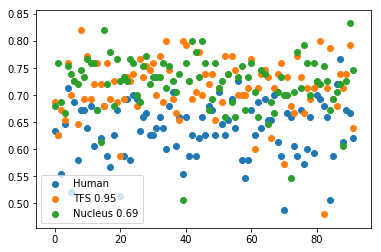

In [213]:
key_pars_to_plot = ['tfs_0.95','n_0.69']#['tfs_0.9', 'tfs_0.95', 'tfs_0.99', 'n_0.63', 'n_0.69', 'n_0.81', 'k_40', '']

to_iter = ground_tot_token_occ['ground'+'_is_prompt-'+str(False)]
x_axis = range(0,len(to_iter))
y_axis = []
for ind, el in enumerate(to_iter):
    word_percentage_temp = el[0] / el[1]
    y_axis.append(word_percentage_temp)
plt.scatter(x_axis, y_axis, label='Human')
human_freqs = y_axis

to_df = dict()

to_df['Human'] = y_axis

for key, params in vals_dict.items():
    for par in params:  
        
        if key+'_'+str(par) in key_pars_to_plot:
        
            to_iter = tot_token_occ[key+'-sampling-type_'+str(par)+'_is_prompt-'+str(False)]

            if key=='n':
                key_label = "Nucleus"
            elif key=='tfs':
                key_label='TFS'
            elif key=='k':
                key_label='Top K'

            x_axis = range(0,len(to_iter))
            y_axis = []
            human_deviation = 0
            for ind, el in enumerate(to_iter):
                word_percentage_temp = el[0] / el[1]
                
                human_deviation+=np.abs(human_freqs[ind]-word_percentage_temp)
                
                y_axis.append(word_percentage_temp)
                
            to_df[key_label+' '+str(par)] = y_axis
                
            plt.scatter(x_axis, y_axis, label=key_label+" "+str(par))
            
            print('Human deviation for ', key, 'is', human_deviation/len(to_iter))

df_freqs = pd.DataFrame(to_df)
plt.legend()
plt.show()

        

In [214]:
mu = df_freqs.mean()


In [215]:
err = (1.96*(df_freqs.std() /np.sqrt(df_freqs.shape[1]) ) )

In [216]:
df_freqs.columns.tolist()

['Human', 'TFS 0.95', 'Nucleus 0.69']

([<matplotlib.axis.XTick at 0x8296becc0>,
 <a list of 3 Text xticklabel objects>)

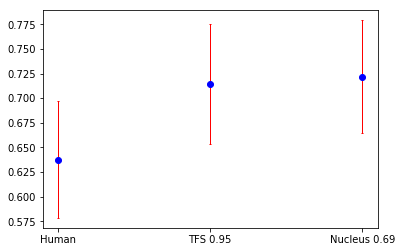

In [217]:
x_pos = range(0,df_freqs.shape[1])
plt.errorbar(x_pos, mu, err, ecolor='red', fmt='o', linewidth=1, capsize=1, color = 'blue')
plt.xticks(x_pos, df_freqs.columns.tolist())

# Getting and plotting the prompt token diversity vs the generation diversity, with the prompt diversity on the x axis. 

[0.65, 0.65, 0.56, 0.58, 0.78, 0.78, 0.77, 0.72, 0.81, 0.66, 0.78, 0.74, 0.75, 0.77, 0.71, 0.7, 0.71, 0.75, 0.7, 0.65, 0.63, 0.74, 0.77, 0.75, 0.8, 0.77, 0.72, 0.73, 0.79, 0.74, 0.82, 0.76, 0.68, 0.76, 0.78, 0.83, 0.76, 0.71, 0.63, 0.73, 0.76, 0.76, 0.69, 0.67, 0.77, 0.78, 0.7, 0.73, 0.74, 0.63, 0.7, 0.7, 0.74, 0.72, 0.73, 0.86, 0.75, 0.67, 0.66, 0.82, 0.75, 0.74, 0.72, 0.78, 0.78, 0.74, 0.68, 0.71, 0.66, 0.74, 0.58, 0.75, 0.77, 0.66, 0.73, 0.77, 0.78, 0.7, 0.7, 0.62, 0.75, 0.74, 0.68, 0.7, 0.68, 0.77, 0.72, 0.8, 0.7, 0.79, 0.73, 0.76]
[0.65, 0.65, 0.56, 0.57, 0.78, 0.78, 0.77, 0.72, 0.81, 0.66, 0.78, 0.74, 0.75, 0.77, 0.71, 0.7, 0.71, 0.75, 0.7, 0.65, 0.62, 0.74, 0.77, 0.75, 0.8, 0.77, 0.72, 0.72, 0.79, 0.74, 0.82, 0.76, 0.68, 0.76, 0.77, 0.83, 0.75, 0.71, 0.62, 0.73, 0.76, 0.75, 0.69, 0.67, 0.77, 0.78, 0.7, 0.73, 0.73, 0.63, 0.7, 0.7, 0.74, 0.72, 0.73, 0.86, 0.75, 0.67, 0.66, 0.81, 0.75, 0.74, 0.72, 0.78, 0.78, 0.74, 0.67, 0.7, 0.66, 0.73, 0.58, 0.75, 0.77, 0.66, 0.73, 0.77, 0.77, 0.

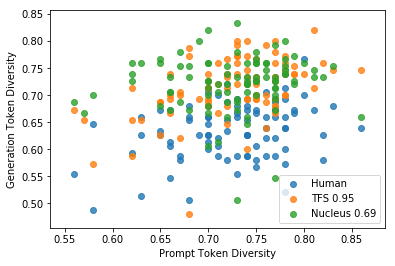

In [218]:
key_pars_to_plot = ['tfs_0.95','n_0.69']#['tfs_0.9', 'tfs_0.95', 'tfs_0.99', 'n_0.63', 'n_0.69', 'n_0.81', 'k_40', '']

to_iter = ground_tot_token_occ['ground'+'_is_prompt-'+str(False)]
y_axis = []
for ind, el in enumerate(to_iter):
    word_percentage_temp = el[0] / el[1]
    y_axis.append(word_percentage_temp)
    
to_iter = ground_tot_token_occ['ground'+'_is_prompt-'+str(True)]
x_axis = []
for ind, el in enumerate(to_iter):
    word_percentage_temp = el[0] / el[1]
    x_axis.append(word_percentage_temp)
plt.scatter(x_axis, y_axis, label='Human', alpha=0.8)
print(x_axis)
human_freqs_prompt_true = x_axis
human_freqs_prompt_false = y_axis

to_df = dict()
to_df['Human'] = y_axis

for key, params in vals_dict.items():
    for par in params:  
        
        if key+'_'+str(par) in key_pars_to_plot:
        
            to_iter = tot_token_occ[key+'-sampling-type_'+str(par)+'_is_prompt-'+str(False)]

            if key=='n':
                key_label = "Nucleus"
            elif key=='tfs':
                key_label='TFS'
            elif key=='k':
                key_label='Top K'

            y_axis = []
            human_deviation = 0
            for ind, el in enumerate(to_iter):
                word_percentage_temp = el[0] / el[1]
                
                human_deviation+=np.abs(human_freqs[ind]-word_percentage_temp)
                
                y_axis.append(word_percentage_temp)
                
                
            to_iter = tot_token_occ[key+'-sampling-type_'+str(par)+'_is_prompt-'+str(True)]
            x_axis = []
            for ind, el in enumerate(to_iter):
                word_percentage_temp = el[0] / el[1]
                x_axis.append(word_percentage_temp)
            print(x_axis)
            plt.scatter(x_axis, y_axis, label=key_label+" "+str(par), alpha=0.8)
                
            to_df[key_label+' '+str(par)] = y_axis
            
            print('Human deviation for ', key, 'is', human_deviation/len(to_iter))

df_freqs = pd.DataFrame(to_df)
#plt.plot(np.arange(0,1,0.05), np.arange(0,1,0.05))

plt.legend()
plt.xlabel('Prompt Token Diversity')
plt.ylabel('Generation Token Diversity')
plt.show()

        

# Plotting the frequencies

In [105]:
def freqPlotter(type_plot, dictionary, ground_dictionary, params_to_plot, prompts_wanted):
    for key, params in vals_dict.items():
        for par in params:            
            for i in prompts_wanted:
                sortedd = dictionary[key+'-sampling-type_'+str(par)+'prompt_'+str(i)].sort_values('freq', ascending=True)
                sortedd_freq = sortedd.freq.cumsum()
                
                if key=='n':
                    key_label = "Nucleus"
                elif key=='tfs':
                    key_label='TFS'
                elif key=='k':
                    key_label='Top K'
                
                if params_to_plot == None: 
                    plt.plot(sortedd.freq, sortedd_freq, label=key_label+' '+str(par), alpha=0.8)

                else:
                    if key+'_'+str(par) in params_to_plot:
                        plt.plot(sortedd.freq, sortedd_freq, label=key_label+' '+str(par), alpha=0.8)
                
    #plot the ground truth
    for i in prompts_wanted:
        
        sortedd = ground_dictionary['ground_prompt_'+str(i)].sort_values('freq', ascending=True)
        sortedd_freq = sortedd.freq.cumsum()
        plt.plot(sortedd.freq, sortedd_freq, label='Human', alpha=0.8)
        print('should be making ground')

    plt.title('Frequency vs CDF of '+type_plot+' Vocabulary for all Prompts')
    plt.xlabel(type_plot+' Frequency')
    plt.ylabel('Vocabulary CDF across all Prompts')
    plt.legend(loc='lower right')
    plt.gcf().savefig('ImageOutputs/FrequencyvsCDFof_'+type_plot+'.png', dpi=250)
    plt.show()

In [106]:
ground_token_freq_percentage['ground_prompt_91'];#.keys()

In [107]:
vals_dict

{'tfs': [0.25, 0.75, 0.9, 0.95, 0.99],
 'flat': [0.01, 0.02, 0.05],
 'n': [0.1, 0.25, 0.5, 0.63, 0.69, 0.75, 0.81, 0.9],
 'k': [1, 10, 40, 200]}

# Word Frequency

In [108]:
params_to_plot = ['tfs_0.95', 'n_0.69', 'k_40', 'k_1'] # 'tfs_0.9',  'n_0.63',
#['k_1','k_200', 'tfs_0.25','tfs_0.75', 'tfs_0.9', 'tfs_0.95','n_0.9',  'n_0.75', 'flat_0.02']
inds_to_plot = [91]

# Token Frequency

should be making ground


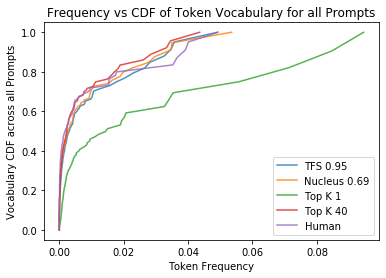

In [109]:

freqPlotter('Token', token_freq_percentage, ground_token_freq_percentage, params_to_plot, inds_to_plot)

should be making ground


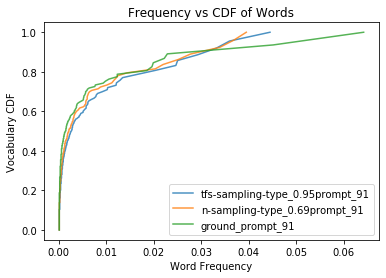

In [62]:

freqPlotter('Word', word_freq_percentage,ground_word_freq_percentage, params_to_plot, inds_to_plot)

# Statistically find the one that is closest. 
# How much word overlap, not just frequency, is there?